## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger (x) 
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!" () 
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
import tensorflow as tf
from tensorflow import keras
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/mnist.npz"

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

### Validation Set

In [3]:
x_train, y_train, x_valid, y_valid = x_train[:55000,...], y_train[:55000,...], x_train[55000:,...], y_train[55000:,...]

In [4]:
set(y_valid)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [5]:
y_train.shape

(55000,)

### Data Preprocessing 

In [6]:
def preprocess(x_batch, y_batch): 
    x_batch = x_batch[..., tf.newaxis]
    return x_batch, y_batch

In [7]:
dataset = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(x_train), tf.data.Dataset.from_tensor_slices(y_train)))


2021-10-18 16:35:00.092729: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 16:35:00.102095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 16:35:00.102952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 16:35:00.104702: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
dataset = dataset.cache()

In [9]:
dataset = dataset.shuffle(buffer_size = 100, seed  = 101)

In [10]:
#dataset = dataset.repeat(2) # Let's just take the dataset x5 

In [11]:
dataset = dataset.batch(1)

In [12]:
dataset = dataset.map(preprocess)

In [13]:
dataset = dataset.prefetch(1)


In [14]:
for x,y in dataset.take(1): 
    print(x.shape)
    print(y)

(1, 28, 28, 1)
tf.Tensor([6], shape=(1,), dtype=uint8)


2021-10-18 16:35:03.561897: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-18 16:35:03.592348: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Building the model 

In [18]:
model = tf.keras.Sequential([
    keras.layers.Conv2D(64, 7, activation = "relu", padding = "same", input_shape=[28,28,1]),
    keras.layers.MaxPool2D(2),
    keras.layers.Conv2D(128, 3, activation = "relu", padding = "same"),
    keras.layers.MaxPool2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = "softmax")
])

In [19]:
model.compile(optimizer="nadam", loss=keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [20]:
history = model.fit(dataset, epochs = 5)

Epoch 1/5
55000/55000 [==============================] - 247s 4ms/step - loss: 0.7691 - accuracy: 0.8133
Epoch 2/5
55000/55000 [==============================] - 244s 4ms/step - loss: 0.6949 - accuracy: 0.8603
Epoch 3/5
55000/55000 [==============================] - 244s 4ms/step - loss: 0.7531 - accuracy: 0.8453
Epoch 4/5
55000/55000 [==============================] - 245s 4ms/step - loss: 0.8442 - accuracy: 0.8359
Epoch 5/5
55000/55000 [==============================] - 245s 4ms/step - loss: 0.9033 - accuracy: 0.8168


In [291]:
 model = tf.keras.models.Sequential([
        keras.layers.Flatten(input_shape = [28,28]),
        keras.layers.Normalization(),
        keras.layers.Dense(50, activation=keras.activations.relu),
        #keras.layers.Dropout(0.1),
        keras.layers.Dense(100, activation=keras.activations.relu),
        keras.layers.Dense(30, activation=keras.activations.relu),

        #keras.layers.Dropout(0.1),
        keras.layers.Dense(10, activation=keras.activations.softmax)])

In [292]:
 model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [293]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 784)               0         
_________________________________________________________________
normalization_18 (Normalizat (None, 784)               1569      
_________________________________________________________________
dense_87 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_88 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_89 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_90 (Dense)             (None, 10)                310       
Total params: 49,259
Trainable params: 47,690
Non-trainable params: 1,569
_____________________________________________

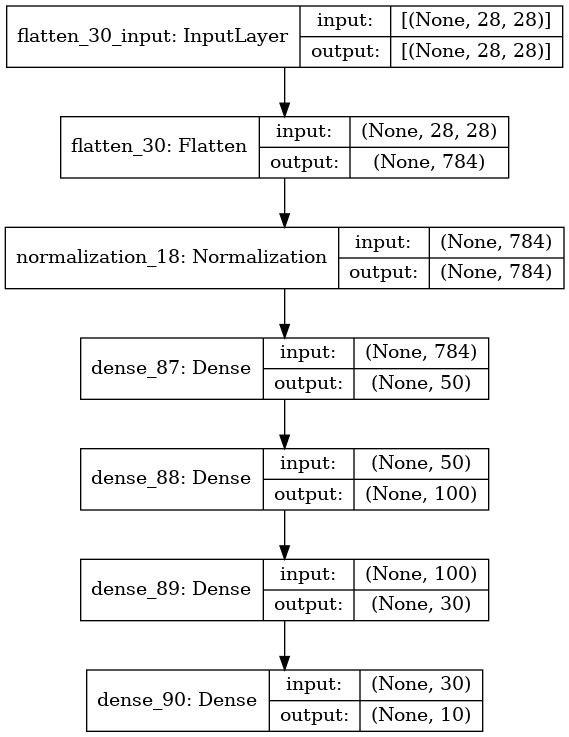

In [294]:
keras.utils.plot_model(model, show_shapes = True)

### Callback Class

In [302]:
class onStopTraining(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        acc = logs["accuracy"]
        if acc >= 0.99:
            print("Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [303]:
stopTraining = onStopTraining()

### Model Training

In [305]:
history = model.fit(dataset, epochs = 10, validation_data = (x_valid, y_valid), callbacks = [stopTraining])

Epoch 1/10
8594/8594 [==============================] - 18s 2ms/step - loss: 0.0693 - accuracy: 0.9820 - val_loss: 0.1637 - val_accuracy: 0.9690
Epoch 2/10
8594/8594 [==============================] - 18s 2ms/step - loss: 0.0592 - accuracy: 0.9845 - val_loss: 0.1446 - val_accuracy: 0.9708
Epoch 3/10
8594/8594 [==============================] - 17s 2ms/step - loss: 0.0518 - accuracy: 0.9869 - val_loss: 0.1617 - val_accuracy: 0.9712
Epoch 4/10
8594/8594 [==============================] - 17s 2ms/step - loss: 0.0485 - accuracy: 0.9880 - val_loss: 0.1916 - val_accuracy: 0.9704
Epoch 5/10
8594/8594 [==============================] - 17s 2ms/step - loss: 0.0468 - accuracy: 0.9889 - val_loss: 0.1877 - val_accuracy: 0.9712
Epoch 6/10
8594/8594 [==============================] - 17s 2ms/step - loss: 0.0453 - accuracy: 0.9892 - val_loss: 0.2260 - val_accuracy: 0.9706
Epoch 7/10
8594/8594 [==============================] - 17s 2ms/step - loss: 0.0430 - accuracy: 0.9901 - val_loss: 0.2109 - val_ac

<AxesSubplot:>

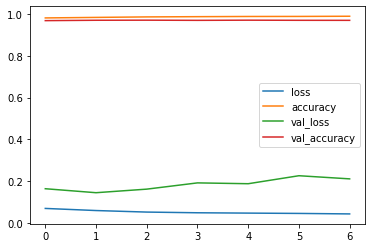

In [306]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [307]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    # YOUR CODE SHOULD START HERE

    # YOUR CODE SHOULD END HERE
    model = tf.keras.models.Sequential([
        # YOUR CODE SHOULD START HERE
    
        # YOUR CODE SHOULD END HERE
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(# YOUR CODE SHOULD START HERE
              # YOUR CODE SHOULD END HERE
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]

In [308]:
train_mnist()

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [4]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);